## Workshop

In [3]:
import pandas as pd
import logging as LOG
import matplotlib.pyplot as plt
import seaborn as sb

LOG.basicConfig(
    format="%(asctime)s %(levelname)-8s %(message)s",
    level=LOG.INFO,
    datefmt="%Y-%m-%d %H:%M:%S"
)
LOGGING = LOG.getLogger(__name__)
LOGGING.setLevel(LOG.DEBUG)

## Importing data

In [5]:
class AcquireData:
    """Acquire a comma-separated values file
       and adjust data into dictionary"""
    
    def __init__(self):
        pass
    
    def import_data(self):

        retry = True
        
        while retry:
            file_name = input("Inserisci il nome del file di input: ")
            
            try:
                with open(f"input/{file_name}", "r") as f:
                    data = f.readlines()
                
                LOG.info(f"File acquired successfully")
                
                retry = False
            
            except FileNotFoundError:
                LOG.error(f"File not found")
                
        output = self.normalize_data(data_input=data)
        
        return output      
            
                
    def normalize_data(self, data_input):
        data_input = [d.replace(",,", ",NaN,") for d in data_input]
        
        keys = [s.strip().split(",") 
                for s in data_input][0]
        
        data = {}
        for key, i in enumerate(range(len(keys))):
            data[keys[key]] = [s.strip().split(",")[i] 
                               for s in data_input][1:]
            
        return data

In [7]:
AcquireData?

Init signature: AcquireData()
Docstring:     
Acquire a comma-separated values file
and adjust data into dictionary
Type:           type
Subclasses:     

In [9]:
print(AcquireData.__doc__)

Acquire a comma-separated values file
       and adjust data into dictionary


In [11]:
data_input = AcquireData().import_data()

Inserisci il nome del file di input:  mtcars.xls


2024-08-26 15:42:44 ERROR    File not found


Inserisci il nome del file di input:  mtcars.xlsx


2024-08-26 15:42:51 ERROR    File not found


Inserisci il nome del file di input:  mtcars.csv


2024-08-26 15:42:55 INFO     File acquired successfully


#### Compare my data set with data set imported by read csv function of pandas

In [13]:
data_input

{'model': ['Mazda RX4',
  'Mazda RX4 Wag',
  'Datsun 710',
  'Hornet 4 Drive',
  'Hornet Sportabout',
  'Valiant',
  'Duster 360',
  'Merc 240D',
  'Merc 230',
  'Merc 280',
  'Merc 280C',
  'Merc 450SE',
  'Merc 450SL',
  'Merc 450SLC',
  'Cadillac Fleetwood',
  'Lincoln Continental',
  'Chrysler Imperial',
  'Fiat 128',
  'Honda Civic',
  'Toyota Corolla',
  'Toyota Corona',
  'Dodge Challenger',
  'AMC Javelin',
  'Camaro Z28',
  'Pontiac Firebird',
  'Fiat X1-9',
  'Porsche 914-2',
  'Lotus Europa',
  'Ford Pantera L',
  'Ferrari Dino',
  'Maserati Bora',
  'Volvo 142E'],
 'mpg': ['21',
  '21',
  '22.8',
  '21.4',
  '18.7',
  '18.1',
  '14.3',
  '24.4',
  '22.8',
  '19.2',
  '17.8',
  '16.4',
  '17.3',
  '15.2',
  '10.4',
  '10.4',
  '14.7',
  '32.4',
  '30.4',
  '33.9',
  '21.5',
  '15.5',
  '15.2',
  '13.3',
  '19.2',
  '27.3',
  '26',
  '30.4',
  '15.8',
  '19.7',
  '15',
  '21.4'],
 'cyl': ['6',
  '6',
  '4',
  '6',
  '8',
  '6',
  '8',
  '4',
  '4',
  '6',
  '6',
  '8',
  '8',

In [15]:
df_1 = pd.DataFrame(data=data_input)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   model   32 non-null     object
 1   mpg     32 non-null     object
 2   cyl     32 non-null     object
 3   disp    32 non-null     object
 4   hp      32 non-null     object
 5   drat    32 non-null     object
 6   wt      32 non-null     object
 7   qsec    32 non-null     object
 8   vs      32 non-null     object
 9   am      32 non-null     object
 10  gear    32 non-null     object
 11  carb    32 non-null     object
dtypes: object(12)
memory usage: 3.1+ KB


In [17]:
df_2 = pd.read_csv("input/mtcars.csv", dtype="object")
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   model   32 non-null     object
 1   mpg     32 non-null     object
 2   cyl     32 non-null     object
 3   disp    32 non-null     object
 4   hp      32 non-null     object
 5   drat    32 non-null     object
 6   wt      32 non-null     object
 7   qsec    32 non-null     object
 8   vs      32 non-null     object
 9   am      32 non-null     object
 10  gear    32 non-null     object
 11  carb    32 non-null     object
dtypes: object(12)
memory usage: 3.1+ KB


In [19]:
df_1.equals(df_2)

True

#### Convert quantitative variables to a numeric type

In [45]:
cols = df_1.columns[1:]

In [21]:
df_1[df_1.columns[1:]] = df_1[df_1.columns[1:]].apply(pd.to_numeric)

In [23]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


## Data preprocessing

In [25]:
df_1.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Split column "model" into two columns: "manufacturer" and "model"

In [27]:
old_column = df_1["model"].str.split(" ", expand=True)
manufacturer = old_column[0]
model = old_column[1] + " " + old_column[2]

# add new column 
df_1.insert(0, "manufacturer", manufacturer)
del manufacturer
# replace column of model
df_1["model"] = model

In [29]:
df_1

,manufacturer,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda,NaN,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda,RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun,NaN,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet,4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet,NaN,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,NaN,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster,NaN,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc,NaN,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc,NaN,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc,NaN,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [41]:
df_1.isna().sum()

manufacturer    0
mpg             0
cyl             0
disp            0
hp              0
drat            0
wt              0
qsec            0
vs              0
am              0
gear            0
carb            0
dtype: int64

In [35]:
def sieve_data(dataset: pd.DataFrame, threshold: float) -> pd.DataFrame:
    isna = dataset.isna().sum() / len(dataset) > threshold
    isna[isna == True].index

    return dataset.drop(columns=isna[isna == True].index)

In [43]:
df_1 = sieve_data(dataset=df_1, threshold=.75)

Insert a column of id values for each unique row

In [45]:
df_1

,manufacturer,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [47]:
df_1.insert(0, "id", [id(i) for i in df_1.index])

Check if column of ids contains duplicated values

In [49]:
df_1[df_1["id"].duplicated()]

,id,manufacturer,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb


## Statistical data analysis

#### Categorical variables

In [51]:
manufacturers = df_1.groupby(by="manufacturer")\
    .agg({"id": "count"})\
    .sort_values(by="id", 
                 ascending=True)\
    .reset_index()\
    .rename(columns={"id": "n"})

In [53]:
manufacturers

,manufacturer,n
0,AMC,1
1,Porsche,1
2,Pontiac,1
3,Maserati,1
4,Lotus,1
5,Lincoln,1
6,Valiant,1
7,Ford,1
8,Honda,1
9,Ferrari,1


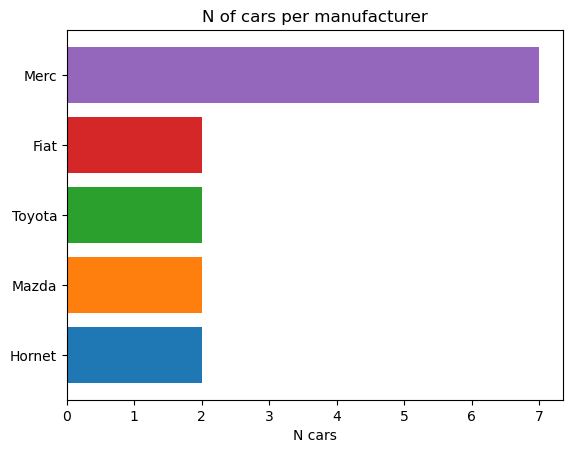

In [55]:
most_relevant = manufacturers.query("n > 1")
N = len(manufacturers)

plt.barh(
    most_relevant["manufacturer"], 
    most_relevant["n"],
    color=[f"C{_}" for _ in range(N)]
)
plt.title("N of cars per manufacturer")
plt.xlabel("N cars");

In [57]:
others = manufacturers\
    .groupby(by="n")\
    .count()\
    .reset_index()\
    .query("n == 1")\
    .rename(columns={
        "n": "manufacturer", 
        "manufacturer": "n"}
    )

In [59]:
others.loc[others["manufacturer"] == 1, "manufacturer"] = "Other"
others

C:\Users\UTENTE\AppData\Local\Temp\ipykernel_11432\1429255764.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Other' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  others.loc[others["manufacturer"] == 1, "manufacturer"] = "Other"


,manufacturer,n
0,Other,17


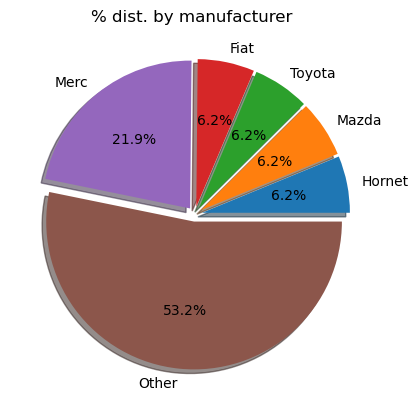

In [61]:
all_manufacturers = pd.concat([most_relevant, others])\
    .assign(perc = lambda x: 
            round(100 * x.n / x.n.sum(), 1)
           )
N = len(all_manufacturers)

plt.pie(
    all_manufacturers.perc,
    labels=all_manufacturers.manufacturer,
    autopct='%1.1f%%',
    colors=[f"C{_}" for _ in range(N)],
    shadow=True,
    frame=False,
    explode=tuple(.05 for i in range(N))
)

plt.title("% dist. by manufacturer ");

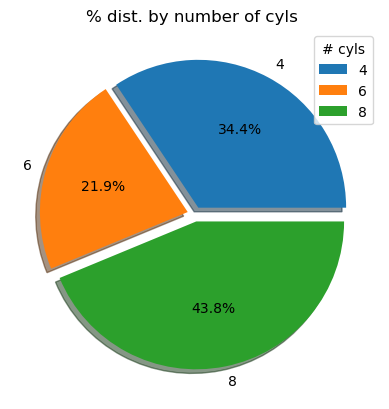

In [63]:
cyls = df_1.groupby(by="cyl")\
    .agg({"id": "count"})\
    .reset_index()\
    .rename(columns={"id": "n"})\
    .assign(perc = lambda x: 
            round(100 * x.n / x.n.sum(), 1))

N = len(cyls)

plt.pie(
    cyls.perc,
    labels=cyls.cyl,
    autopct='%1.1f%%',
    colors=[f"C{_}" for _ in range(N)],
    shadow=True,
    frame=False,
    explode=tuple(.05 for i in range(N))
)

plt.title("% dist. by number of cyls ")
plt.legend(title="# cyls");

#### Quantitative variables

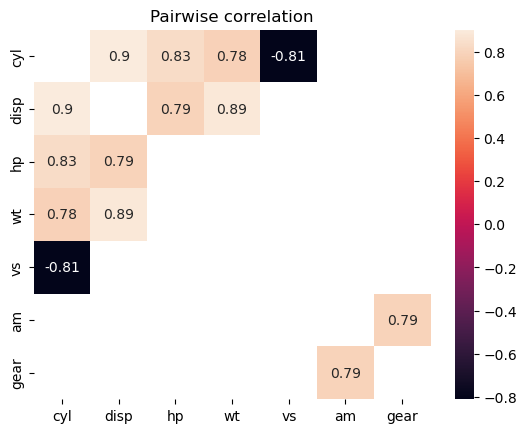

In [65]:
corr = df_1.iloc[:,3:].corr(method="pearson")
corr = corr[(abs(corr) >= .75) & (corr < 1)]\
    .dropna(how="all", axis=0)\
    .dropna(how="all", axis=1)

sb.heatmap(data=corr, annot=True)
plt.title("Pairwise correlation");

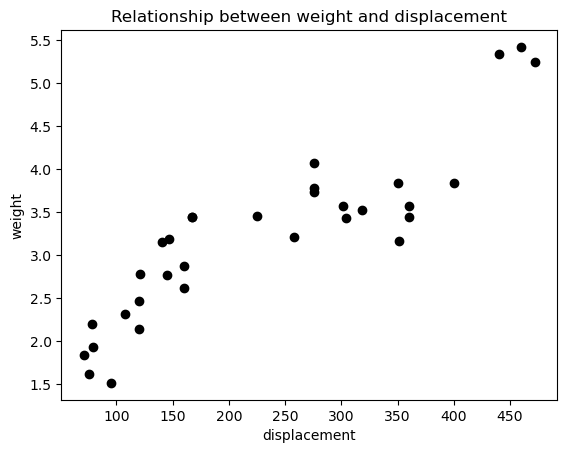

In [67]:
plt.scatter(
    x=df_1.disp,
    y=df_1.wt,
    color="k"
)
plt.title("Relationship between weight and displacement")
plt.xlabel("displacement")
plt.ylabel("weight");

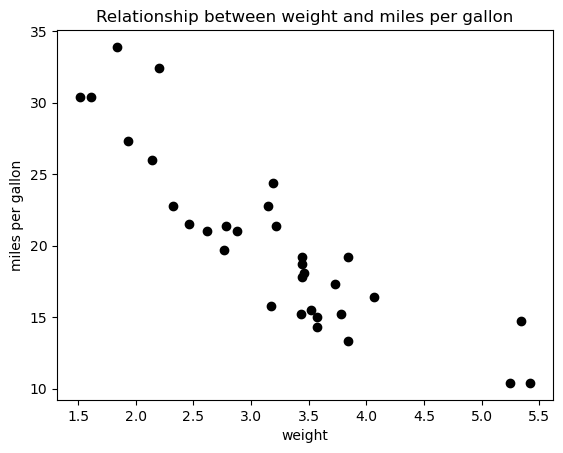

In [69]:
plt.scatter(
    x=df_1.wt,
    y=df_1.mpg,
    color="k"
)
plt.title("Relationship between weight and miles per gallon")
plt.xlabel("weight")
plt.ylabel("miles per gallon");

Distribution of qsec (quarter mile time in seconds)

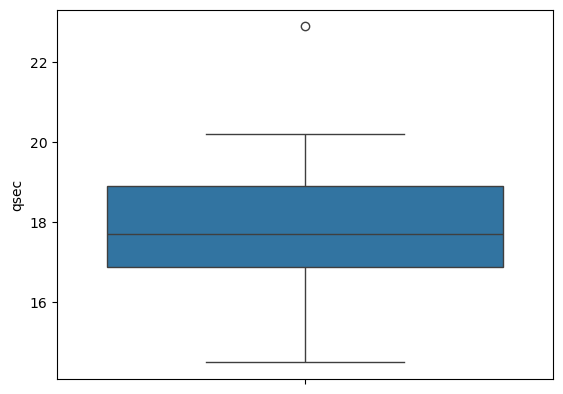

In [71]:
sb.boxplot(data=df_1.qsec);

In [78]:
from numpy import mean, var, exp, pi, linspace

In [80]:
x = linspace(df_1.qsec.min(), df_1.qsec.max())
m, s = mean(df_1.qsec), var(df_1.qsec)

$$N(\mu,\sigma) := f_X(x) = \frac{1}{\sqrt{2\pi\sigma}} e^{-\frac{1}{2} \frac{(x-\mu)^2}{\sigma}}$$

In [82]:
def Norm(values, mean, var):
    return (2*pi*var)**-.5 * \
            exp(-.5 * (values-mean)**2/s)

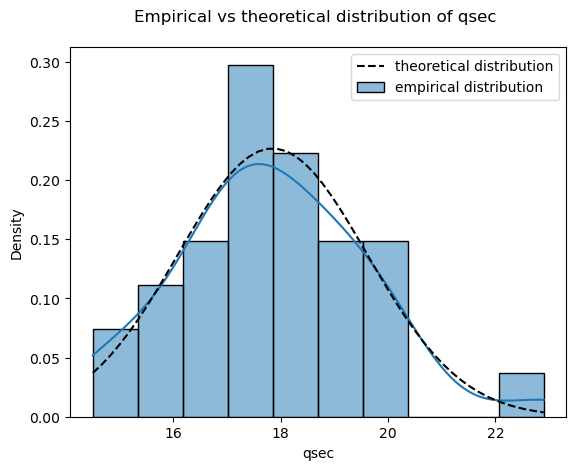

In [84]:
plt.title('Empirical vs theoretical distribution of qsec \n')

sb.histplot(
    data=df_1.qsec, 
    kde=True, 
    bins=10, 
    stat="density", 
    label="empirical distribution"
)

plt.plot(
    x, Norm(values=x, mean=m, var=s), 
    color="k", 
    label="theoretical distribution",
    linestyle='dashed'
)

plt.legend();